# Exploratory Data Analysis & Visualization Project (Finance)

### 1. Retrieve data & transform data into usable format

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

#Ceate list of tickers=
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [3]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106030  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743805  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787273  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736557  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758305  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139030  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238129  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275284  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659290  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444866  
2006-01-04   31.799999  31.530001  10870000.0  20.207739  
2006-01-05   31.500000  31.495001  10158000.0  20.185299  
2006-01-06   31.580000  31.680000   8403800.0  20.303871  
2006-01-09   31.674999  31.674999   5619600.0  20.300669  

[5 rows x 36 columns]

### 2. Exploratory Data Analysis

In [4]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


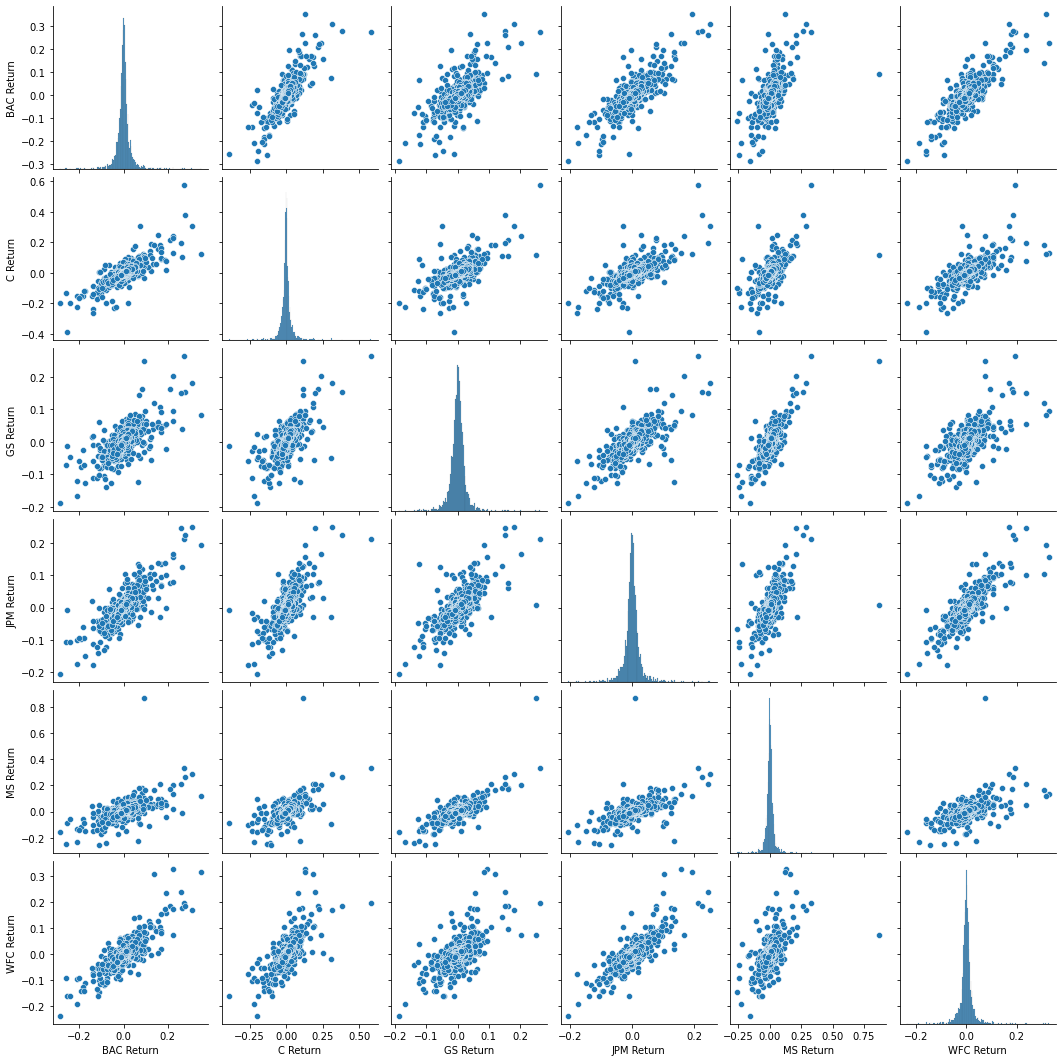

In [5]:
import seaborn as sns
sns.pairplot(returns[1:])

In [6]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

We notice that 4 of the banks shared the same worst drop. 2009-01-20 was the first inauguration of Barack Obama as the 44th president.

In [7]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We notice that JPMorgan Chase's largest drop and gain were very close to one another. Such happening could been a result of JPMorgan Chase's CEO buying the company's stocks.

In [8]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In terms of volatility of the stock, Citigroup had the most volatility while Goldman Sachs should the most relative stability. Such analysis can be further specified into shorter time period. Look below for year 2013.

In [9]:
returns.loc['2013-01-01':'2013-12-31'].std()

BAC Return    0.014828
C Return      0.014454
GS Return     0.013543
JPM Return    0.012038
MS Return     0.017797
WFC Return    0.010024
dtype: float64

### 3. Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

* Create a line plot showing the closing price for each bank

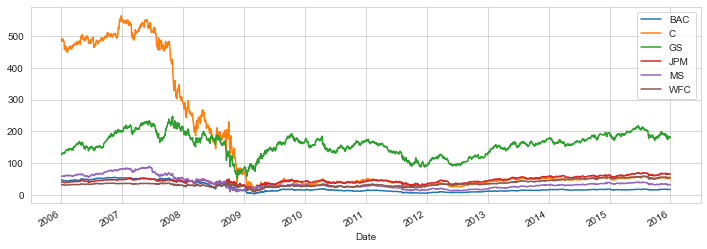

In [11]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In our previous finding, we noticed that Citigroup was the most volatile and Goldman Sachs was the most stable bank stock. Lets compare their moving averages for the year 2008.

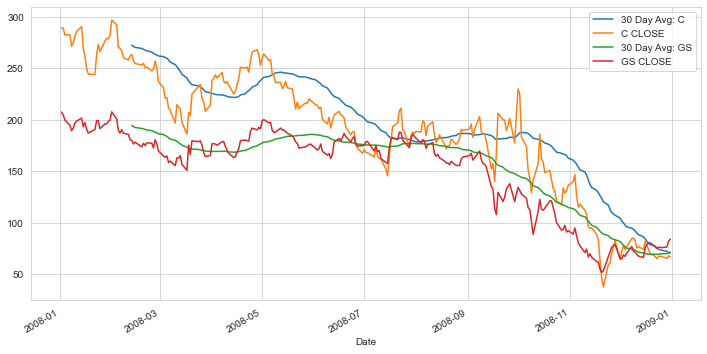

In [12]:
plt.figure(figsize=(12,6))
C['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg: C')
C['Close'].loc['2008-01-01':'2009-01-01'].plot(label='C CLOSE')
GS['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg: GS')
GS['Close'].loc['2008-01-01':'2009-01-01'].plot(label='GS CLOSE')
plt.legend()

* Create a heatmap of the correlation between the stocks' close price

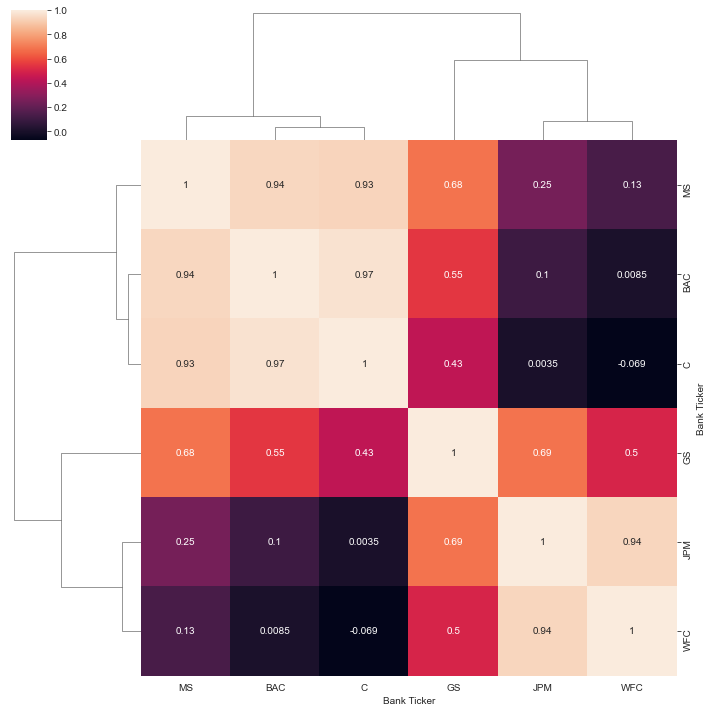

In [13]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

* Create a Bollinger Band Plot for Citigroup for the year 2009(bigest drop)

In [14]:
C['Close'].loc['2009-01-01':'2010-01-01'].ta_plot(study='boll')